# Using PLAYA-PDF to extract internal links

PDFs can contain a bewilderingly large variety of annotations, the most interesting and useful of which are `Link` annotations.  These create areas on the page which, when clicked, can cause a PDF reader to jump to a destination in the same document, open an external URL in a browser, or possibly other actions.

Here we will look at a document (again, a research paper) with a lot of internal links, and build a graph of the links between pages, which we can visualize with `graphviz`.

As usual let's import some basic stuff:

In [1]:
import playa
import paves.image as pi
import graphviz

And load a document:

In [2]:
DOCUMENT = "../samples/contrib/anonymous_type3_fonts.pdf"
pdf = playa.open(DOCUMENT)

Now let's make a `graphviz` graph that just contains edges from the page containing each link to the page of its destination.  As you can see, getting the destination from a link is not entirely straightforward at the moment.  This will be improved in a subsequent version of PLAYA:

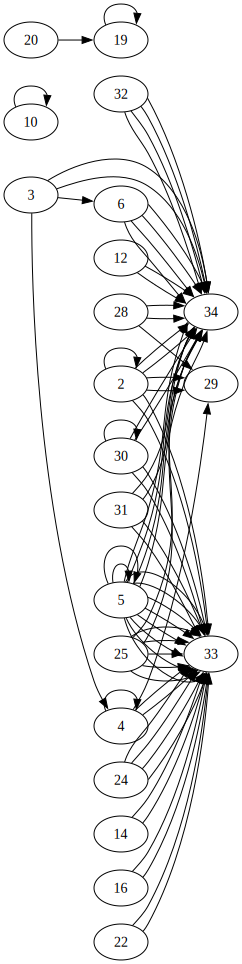

In [11]:
dot = graphviz.Digraph("links", graph_attr={"rankdir": "LR"})
for page in pdf.pages:
    for annot in page.annotations:
        dest = None
        if annot.type == "Link":
            if "D" in annot.props:
                dest = playa.Destination.from_dest(annot.props["D"], pdf)
            if "A" in annot.props and annot.props["A"]["S"].name == "GoTo":
                dest = playa.Destination.from_dest(annot.props["A"]["D"], pdf)
        if dest is not None:
            dot.edge(str(page.label), str(dest.label))
dot